-------------------------------------------------------------------
0.9030250530356809
-------------------------------------------------------------------
Expectation value of Wilson loop aXa  :  0.2918 ± 0.0010
Expectation value of Wilson loop aX2a :  0.0860 ± 0.0011
Expectation value of Wilson loop aX3a :  0.0264 ± 0.0010
Expectation value of Wilson loop 2aX2a:  0.0069 ± 0.0011
Expectation value of Wilson loop 3aX3a:  0.0010 ± 0.0010
-------------------------------------------------------------------


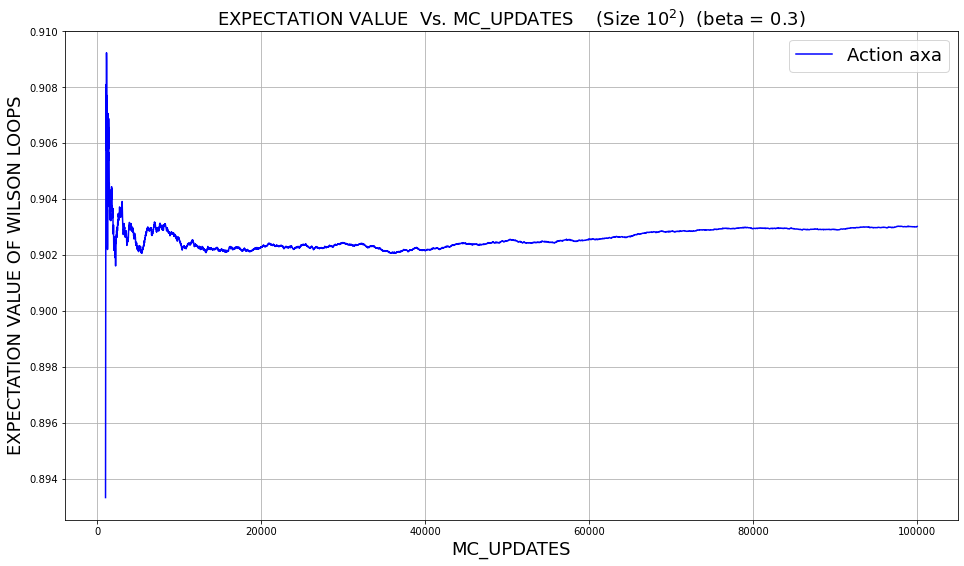

-------------------------------------------------------------------


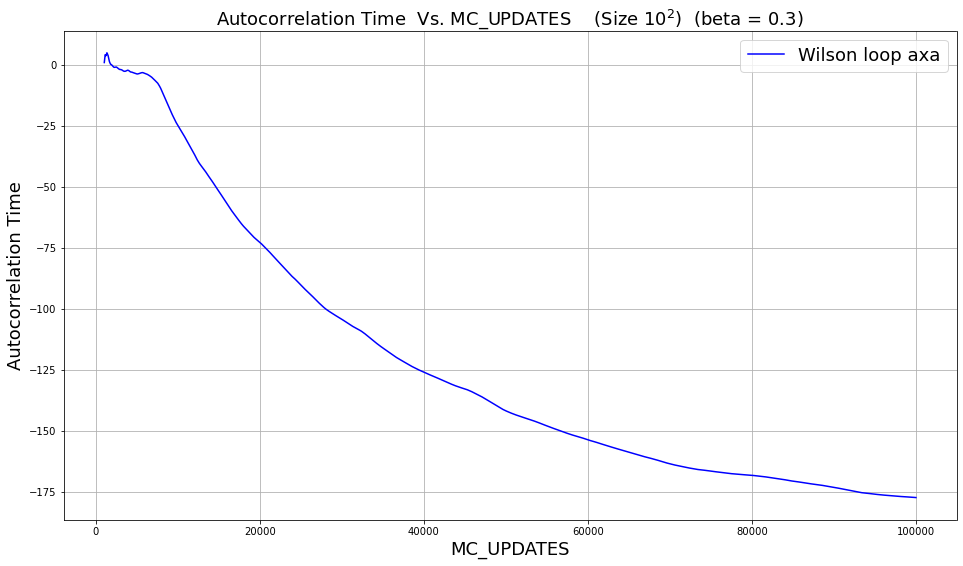

-------------------------------------------------------------------


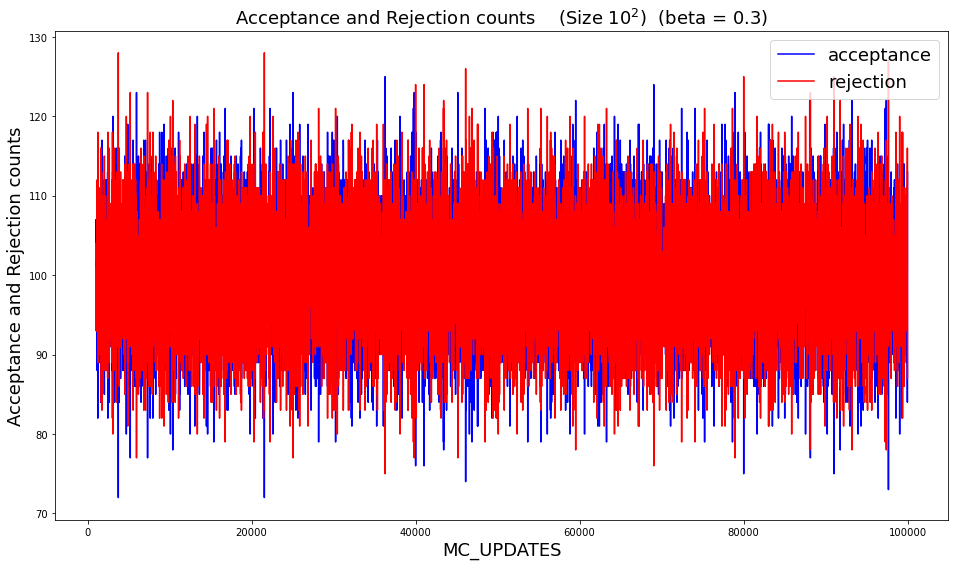

In [258]:
##################################################
#        2-Dimensional Z2 Lattice Gauge          #
#   By Hariprashad Ravikumar [hari1729@nmsu.edu] #
#   For Dr. Engelhardt's meeting (Dec 29, 2022)  #
##################################################

import numpy as np
import numpy.random as rnd
from scipy import random
import itertools
import matplotlib.pyplot as plt


N = 10 # Size of the lattice
latt1 = np.ones((N, N), dtype=int)
latt2 = np.ones((N, N), dtype=int)

# verifying the plaquette
#start = 1
#end = 19 + 1
#latt11 = np.arange(start, end-1, 2).reshape([N, N])[::-1]
#latt22 = np.arange(start+1, end, 2).reshape([N, N])[::-1]



rng = np.random.default_rng()
def randomstart():
    sites = itertools.product(range(N), range(N))
    for site in sites:
        spin = rng.integers(2)
        if spin == 0:
            spin = -1
        latt1[site] = spin
        latt2[site] = spin
    return None


def coldstart():
    latt1[:] = 1
    latt2[:] = 1
    return None      

def action_axa_update(configuration1,configuration2, beta):
    action_total = 0.0
    acceptance_count = 0.0
    rejection_count = 0.0
    for t in range(N):
        for x in range(N):
            ###############
            # middle and right
            
            #plaquette middle
            left1 = configuration1[t,x]
            down1 = configuration2[t,x]
            right1 = configuration1[t,(x+1)%N] ##
            top1 = configuration2[(t-1)%N,x]
            
            #plaquette right
            r_left = right1 ##
            r_down = configuration2[t,(x+1)%N]
            r_right = configuration1[t,(x+2)%N]
            r_top = configuration2[(t-1)%N,(x+1)%N]
            
            staplesum_middle1 = ((top1*left1*down1))
            staplesum_right = ((r_down*r_right*r_top))
            #print(latt22[(t-1)%N,x],latt11[t,x],latt22[t,x])
            #print(latt22[t,(x+1)%N],latt11[t,(x+2)%N],latt22[(t-1)%N,(x+1)%N])
            #print("link being updated",latt11[t,(x+1)%N])
            #print("_____-----____")
            staplesum_middle_right = (staplesum_middle1+staplesum_right) 
            bplus1 = np.exp(beta*staplesum_middle_right)
            bminus1 = np.exp(-beta*staplesum_middle_right)
            bplus1 = bplus1/(bplus1+bminus1)
            r1 = rng.uniform()
            if r1 < bplus1:
                configuration1[t,(x+1)%N] = 1
                action_total += staplesum_middle_right
                acceptance_count += 1
            else:
                configuration1[t,(x+1)%N] = -1
                action_total -= staplesum_middle_right
                rejection_count += 1
                
            ###############
            # middle and top
            
            #plaquette middle
            left2 = configuration1[t,x] 
            down2 = configuration2[t,x]
            right2 = configuration1[t,(x+1)%N]
            top2 = configuration2[(t-1)%N,x] ##
            
            #plaquette top
            t_left = configuration1[(t-1)%N,x]
            t_down = top2 ##
            t_right = configuration1[(t-1)%N,(x+1)%N]
            t_top = configuration2[(t-2)%N,x]
            
            staplesum_middle2 = ((left2*down2*right2))
            staplesum_top = ((t_right*t_top*t_left))
            #print(latt11[t,x] ,latt22[t,x], latt11[t,(x+1)%N])
            #print(latt11[(t-1)%N,(x+1)%N],latt22[(t-2)%N,x],latt11[(t-1)%N,x])
            #print("link being updated",latt22[(t-1)%N,x])
            #print("_____-----____")
            staplesum_middle_top = (staplesum_middle2+staplesum_top) 
            bplus2 = np.exp(beta*staplesum_middle_top)
            bminus2 = np.exp(-beta*staplesum_middle_top)
            bplus2 = bplus2/(bplus2+bminus2)
            r2 = rng.uniform()
            if r2 < bplus2:
                configuration2[(t-1)%N,x] = 1
                action_total += staplesum_middle_top
                acceptance_count += 1
            else:
                configuration2[(t-1)%N,x] = -1
                action_total -= staplesum_middle_top
                rejection_count += 1
    confi1 = configuration1
    confi2 = configuration2
    return 1.-action_total/N**2/2./6., confi1, confi2, acceptance_count, rejection_count

def wilson_axa(configuration1, configuration2, beta):
    Wilson_loop__axa = 0.0
    count = 0.0
    for t in range(N):
        for x in range(N):
            left = configuration1[t,x]
            down = configuration2[t,x]
            right = configuration1[t,(x+1)%N]
            top = configuration2[(t-1)%N,x]
            Wilson_loop__axa += ((left*down*right*top))
            count += 1
    return  Wilson_loop__axa/(count)


def wilson_ax2a(configuration1, configuration2, beta):
    Wilson_loop__ax2a = 0.0
    count = 0.0
    for t in range(N):
        for x in range(N):
            left1 = configuration1[t,x]
            left2 = configuration1[(t+1)%N,x]
            down = configuration2[(t+1)%N,x]
            right2 = configuration1[(t+1)%N,(x+1)%N]
            right1 = configuration1[t,(x+1)%N]
            top = configuration2[(t-1)%N,x]
            Wilson_loop__ax2a += ((left1*left2*down*right2*right1*top))
            count += 1
    return  Wilson_loop__ax2a/(count)




def wilson_2ax2a(configuration1, configuration2, beta):
    Wilson_loop__2ax2a = 0.0
    count = 0.0
    for t in range(N):
        for x in range(N):
            left1 = configuration1[t,x]
            left2 = configuration1[(t+1)%N,x]
            down1 = configuration2[(t+1)%N,x]
            down2 = configuration2[(t+1)%N,(x+1)%N]
            right2 = configuration1[(t+1)%N,(x+2)%N]
            right1 = configuration1[t,(x+2)%N]
            top2 = configuration2[(t-1)%N,(x+1)%N]
            top1 = configuration2[(t-1)%N,x]
            #print(left1,left2,down1,down2,right2,right1,top2,top1)
            Wilson_loop__2ax2a += ((left1*left2*down1*down2*right2*right1*top2*top1))
            count += 1
    return  Wilson_loop__2ax2a/(count)


def wilson_ax3a(configuration1, configuration2, beta):
    Wilson_loop__ax3a = 0.0
    count = 0.0
    for t in range(N):
        for x in range(N):
            left1 = configuration1[t,x]
            left2 = configuration1[(t+1)%N,x]
            left3 = configuration1[(t+2)%N,x]
            down = configuration2[(t+2)%N,x]
            right3 = configuration1[(t+2)%N,(x+1)%N]
            right2 = configuration1[(t+1)%N,(x+1)%N]
            right1 = configuration1[t,(x+1)%N]
            top = configuration2[(t-1)%N,x]
            #print(left1,left2,left3,down,right3,right2,right1,top)
            Wilson_loop__ax3a += ((left1*left2*left3*down*right3*right2*right1*top))
            count += 1
    return  Wilson_loop__ax3a/(count)

def wilson_3ax3a(configuration1, configuration2, beta):
    Wilson_loop__3ax3a = 0.0
    count = 0.0
    for t in range(N):
        for x in range(N):
            left1 = configuration1[t,x]
            left2 = configuration1[(t+1)%N,x]
            left3 = configuration1[(t+2)%N,x]
            down1 = configuration2[(t+2)%N,x]
            down2 = configuration2[(t+2)%N,(x+1)%N]
            down3 = configuration2[(t+2)%N,(x+2)%N]
            right3 = configuration1[(t+2)%N,(x+3)%N]
            right2 = configuration1[(t+1)%N,(x+3)%N]
            right1 = configuration1[t,(x+3)%N]
            top3 = configuration2[(t-1)%N,(x+2)%N]
            top2 = configuration2[(t-1)%N,(x+1)%N]
            top1 = configuration2[(t-1)%N,x]
            #print(left1,left2,left3,down1,down2,down3,right3,right2,right1,top3,top2,top1)
            Wilson_loop__3ax3a += ((left1*left2*left3*down1*down2*down3*right3*right2*right1*top3*top2*top1))
            count += 1
    return  Wilson_loop__3ax3a/(count)




def expectation_axa(beta,N_0,MC_steps):
    coldstart()
    exp_action_axa_lst = []
    exp_axa_lst = []
    exp_ax2a_lst = []
    exp_2ax2a_lst = []
    exp_ax3a_lst = []
    exp_3ax3a_lst = []
    mcstep_lst = []
    acceptance_lst = []
    rejection_lst = []
    exp_action_axa = 0.0
    exp_axa = 0.0
    exp_axa_sqar = 0.0
    exp_ax2a = 0.0
    exp_ax2a_sqar = 0.0
    exp_2ax2a = 0.0
    exp_2ax2a_sqar = 0.0
    exp_ax3a = 0.0
    exp_ax3a_sqar = 0.0
    exp_3ax3a = 0.0
    exp_3ax3a_sqar = 0.0
    count = 0.0
    #acceptance_countt =0.0
    #rejection_countt =0.0
    config1 = latt1
    config2 = latt2
    ### Autocorrelation time for wilson loop axa
    O_wilson_axa_lst = []
    exp_axa_sqar_lst = []
    A_t_numerator = 0.0
    A_t = 0.0
    sigma_sqr = 0.0
    tau_auto_co_time = []
    mcstep_act_lst = []
    for i in range(MC_steps):
        action, config1, config2, acceptance__count, rejection__count = action_axa_update(config1, config2, beta)
        if i > N_0:
            if (i % 10) == 0:
                count += 1 
                acceptance_countt = acceptance__count
                rejection_countt = rejection__count
                acceptance_lst.append(acceptance_countt)
                rejection_lst.append(rejection_countt)
                Wilson_loop_axa = wilson_axa(config1, config2, beta)
                Wilson_loop_ax2a = wilson_ax2a(config1, config2, beta)
                Wilson_loop_2ax2a = wilson_2ax2a(config1, config2, beta)
                Wilson_loop_ax3a = wilson_ax3a(config1, config2, beta)
                Wilson_loop_3ax3a = wilson_3ax3a(config1, config2, beta)
                exp_action_axa += action
                exp_axa += Wilson_loop_axa
                exp_axa_sqar += Wilson_loop_axa**2
                exp_ax2a += Wilson_loop_ax2a
                exp_ax2a_sqar += Wilson_loop_ax2a**2
                exp_2ax2a += Wilson_loop_2ax2a
                exp_2ax2a_sqar += Wilson_loop_2ax2a**2
                exp_ax3a += Wilson_loop_ax3a
                exp_ax3a_sqar += Wilson_loop_ax3a**2
                exp_3ax3a += Wilson_loop_3ax3a
                exp_3ax3a_sqar += Wilson_loop_3ax3a**2
                exp_action_axa_lst.append((exp_action_axa/count))
                exp_axa_lst.append(abs(exp_axa/count))
                exp_ax2a_lst.append(abs(exp_ax2a/count))
                exp_2ax2a_lst.append(abs(exp_2ax2a/count))
                exp_ax3a_lst.append(abs(exp_ax3a/count))
                exp_3ax3a_lst.append(abs(exp_3ax3a/count))
                mcstep_lst.append(i)
                ### Autocorrelation time for wilson loop axa
                O_wilson_axa_lst.append(Wilson_loop_axa)
                exp_axa_sqar_lst.append(exp_axa_sqar)
                if i > (N_0+20):
                    mcstep_act_lst.append(i)
                    A_t_numerator += ((O_wilson_axa_lst[-2])-(exp_axa_lst[-2]))*((O_wilson_axa_lst[-1])-(exp_axa_lst[-1]))
                    sigma_sqr += ((O_wilson_axa_lst[-2])-(exp_axa_lst[-2]))**2
                    A_t_numerator_ave = A_t_numerator/count
                    sigma_sqrr = sigma_sqr/count
                    A_t1 = A_t_numerator_ave/sigma_sqrr
                    A_t += A_t1
                    tau_auto_co_time.append(A_t)
    error_wilson_axa = np.sqrt((exp_axa_sqar/count)-(exp_axa_lst[-1])**2)/np.sqrt(count)  
    error_wilson_ax2a = np.sqrt((exp_ax2a_sqar/count)-(exp_ax2a_lst[-1])**2)/np.sqrt(count)  
    error_wilson_2ax2a = np.sqrt((exp_2ax2a_sqar/count)-(exp_2ax2a_lst[-1])**2)/np.sqrt(count)  
    error_wilson_ax3a = np.sqrt((exp_ax3a_sqar/count)-(exp_ax3a_lst[-1])**2)/np.sqrt(count) 
    error_wilson_3ax3a = np.sqrt((exp_3ax3a_sqar/count)-(exp_3ax3a_lst[-1])**2)/np.sqrt(count)  
    print("-------------------------------------------------------------------")
    print(exp_action_axa_lst[-1])
    print("-------------------------------------------------------------------")
    print("Expectation value of Wilson loop aXa  :  %.4f" %exp_axa_lst[-1],"\u00B1 %.4f" %error_wilson_axa)
    print("Expectation value of Wilson loop aX2a :  %.4f" %exp_ax2a_lst[-1],"\u00B1 %.4f" %error_wilson_ax2a)
    print("Expectation value of Wilson loop aX3a :  %.4f" %exp_ax3a_lst[-1],"\u00B1 %.4f" %error_wilson_2ax2a)
    print("Expectation value of Wilson loop 2aX2a:  %.4f" %exp_2ax2a_lst[-1],"\u00B1 %.4f" %error_wilson_ax3a)
    print("Expectation value of Wilson loop 3aX3a:  %.4f" %exp_3ax3a_lst[-1],"\u00B1 %.4f" %error_wilson_3ax3a)
    return exp_action_axa_lst, exp_axa_lst, exp_ax2a_lst, exp_2ax2a_lst, exp_ax3a_lst, exp_3ax3a_lst, mcstep_lst, acceptance_lst , rejection_lst, tau_auto_co_time, mcstep_act_lst

beta_value = 0.3
n_0 = 1000
mc_steps = 100000

exp_action_axa, exp_axa, exp_ax2a, exp_2ax2a, exp_ax3a, exp_3ax3a, mcstep_lst, acceptance_lst, rejection_lst, tau_auto_co_time, mcstep_act_lst = expectation_axa(beta_value,n_0,mc_steps)

print("-------------------------------------------------------------------")
plt.subplots(figsize=(16, 9))
plt.plot(mcstep_lst, exp_action_axa, color='blue',label= 'Action axa' )
#plt.plot(mcstep_lst, exp_axa, color='blue',label= 'Wilson loop axa' )
#plt.plot(mcstep_lst, exp_ax2a, color='green',label= 'Wilson loop ax2a' )
#plt.plot(mcstep_lst, exp_ax3a, color='magenta',label= 'Wilson loop ax3a' )
#plt.plot(mcstep_lst, exp_2ax2a, color='red',label= 'Wilson loop 2ax2a' )
#plt.plot(mcstep_lst, exp_3ax3a, color='black',label= 'Wilson loop 3ax3a' )
plt.xlabel("MC_UPDATES", fontsize=18)
plt.ylabel("EXPECTATION VALUE OF WILSON LOOPS", fontsize=18)
plt.title("EXPECTATION VALUE  Vs. MC_UPDATES    (Size $%.f^2$)  (beta = %.1f)"%(N,beta_value), fontsize=18)
plt.legend( fontsize=18)
plt.grid(True)
plt.show()

print("-------------------------------------------------------------------")
plt.subplots(figsize=(16, 9))
#plt.plot(mcstep_lst, exp_action_axa, color='blue',label= 'Action axa' )
plt.plot(mcstep_act_lst, tau_auto_co_time, color='blue',label= 'Wilson loop axa' )
plt.xlabel("MC_UPDATES", fontsize=18)
plt.ylabel("Autocorrelation Time", fontsize=18)
plt.title("Autocorrelation Time  Vs. MC_UPDATES    (Size $%.f^2$)  (beta = %.1f)"%(N,beta_value), fontsize=18)
plt.legend( fontsize=18)
plt.grid(True)
plt.show()

print("-------------------------------------------------------------------")
plt.subplots(figsize=(16, 9))
plt.plot(mcstep_lst, acceptance_lst, color='blue',label= 'acceptance' )
plt.plot(mcstep_lst, rejection_lst, color='red',label= 'rejection' )
plt.xlabel("MC_UPDATES", fontsize=18)
plt.ylabel("Acceptance and Rejection counts", fontsize=18)
plt.title("Acceptance and Rejection counts    (Size $%.f^2$)  (beta = %.1f)"%(N,beta_value), fontsize=18)
plt.legend( fontsize=18)
plt.show()